## Homework 3

### Author: Joshua

In [1]:
import numpy as np
import pandas as pd
import sys
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plot
import seaborn as sb

### Listing 2-1: Sizing Up a New Data Set

In [2]:
data = pd.read_csv(r"HY_Universe_corporate bond.csv")

In [3]:
data.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


data.shape

In [4]:
data.size

100677

In [5]:
# arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    row = line.strip().split(",")
    xList.append(row)
sys.stdout.write("Number of Rows of Data = " + str(len(data)) + '\n')
sys.stdout.write("Number of Columns of Data = " + str(len(xList)))



Number of Rows of Data = 2721
Number of Columns of Data = 37

30

### Listing 2-2: Determining the Nature of Attributes

In [6]:
#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().split(",")
    xList.append(row)
    nrow = len(data)
    ncol = len(xList)
    type = [0]*3
colCounts = []
for col in range(ncol):
    for row in xList:
        try:
            a = float(col)
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(row[col]) > 0:
                type[1] += 1
            else:
                type[2] += 1                    
colCounts.append(type)
type = [0]*3
sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")                    
iCol = 0                        
for types in colCounts:
     sys.stdout.write(str(iCol) + '\t\t' + str(types[0]) + '\t\t' + str(types[1]) + '\t\t' + str(types[2]) + "\n")



Col#	Number	Strings	 Other
0		1369		0		0


### Listing 2-3: Summary Statistics for Numeric and Categorical Attributes—

In [7]:
#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().split(",")
    xList.append(row)
    nrow = len(data)
    ncol = len(xList)
    type = [0]*3
colCounts = []
#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList[:col]:
    colData = data.iloc[:,9:11]
colArray = colData.to_numpy(dtype='float')    
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' + "Standard Deviation = " + '\t ' + str(colsd) + "\n")                              


Mean = 	414964773.6377839		Standard Deviation = 	 583520102.8973756


68

#### Listing 2-4: Quantile‐Quantile Plot

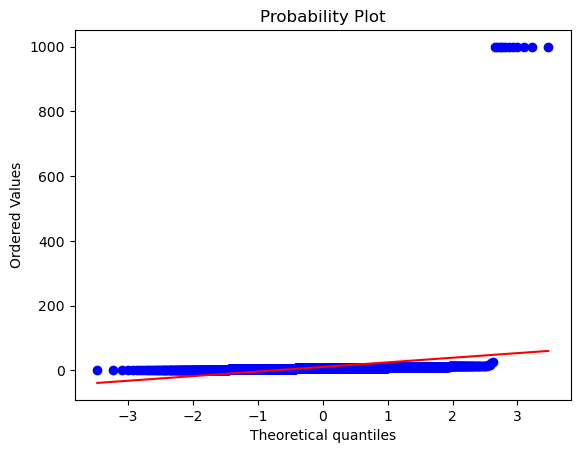

In [8]:
xList = []
labels = []
for line in data:
    #split on comma
    row = line.strip().split(",")
    xList.append(row)
    nrow = len(data)
    ncol = len(xList)
    type = [0]*3
colCounts = []
#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList[:col]:
    colData = data.iloc[:,9:10]
stats.probplot(colData['Coupon'], dist="norm", plot=pylab)
pylab.show()


### Listing 2-5: Using Python Pandas to Read and Summarize Data

In [9]:
#print head and tail of data frame
print(data.head())
print(data.tail())

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

In [10]:
#print summary of data frame
summary = data.describe()
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

### Listing 2-6: Parallel Coordinates Graph for Real Attribute Visualization—linePlots

In [11]:
data_cor = data.iloc[:,29:36]
data_cor.head()

,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades
0,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176
1,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903
2,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612
3,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043
4,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095


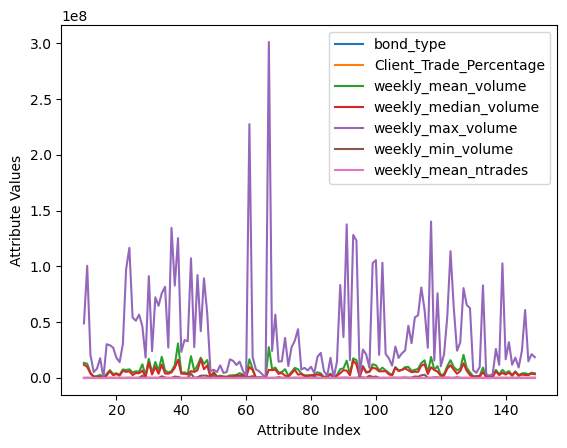

In [12]:
data_cor.iloc[10:150,].plot()
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

### Listing 2-7: Cross Plotting Pairs of Attributes—corrPlot.py

In [13]:
data_cor.columns

Index(['bond_type', 'Client_Trade_Percentage', 'weekly_mean_volume',
       'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume',
       'weekly_mean_ntrades'],
      dtype='object')

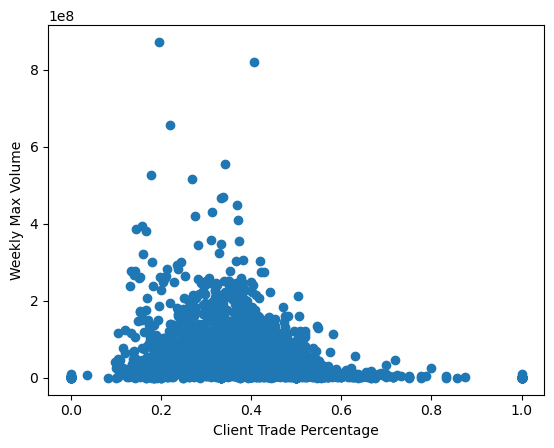

In [14]:
plot.scatter(data_cor['Client_Trade_Percentage'], data_cor['weekly_max_volume'])
plot.xlabel("Client Trade Percentage")
plot.ylabel(("Weekly Max Volume"))
plot.show()

### Listing 2-8: Correlation between Classification Target and Real Attributes—targetCorr.py

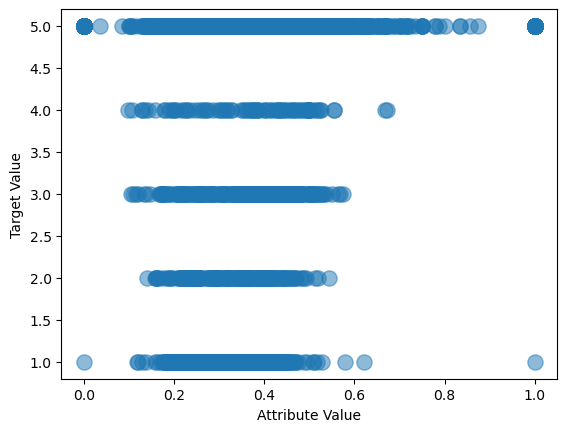

In [15]:
plot.scatter(data['Client_Trade_Percentage'], data['bond_type'], alpha=0.5, s=120)
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

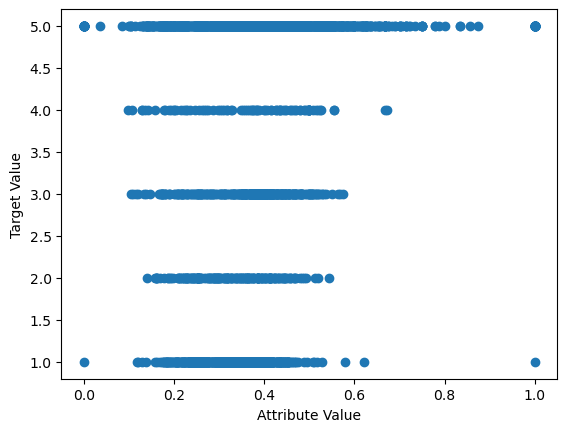

In [16]:
plot.scatter(data['Client_Trade_Percentage'], data['bond_type'])
plot.xlabel("Attribute Value")
plot.ylabel("Target Value")
plot.show()

### Listing 2-9: Pearson’s Correlation Calculation for Attributes 2 versus 3 and 2 versus

In [17]:
print(data_cor.corr())

                         bond_type  Client_Trade_Percentage  \
bond_type                 1.000000                 0.242624   
Client_Trade_Percentage   0.242624                 1.000000   
weekly_mean_volume       -0.323921                -0.173185   
weekly_median_volume     -0.309041                -0.157462   
weekly_max_volume        -0.343817                -0.221389   
weekly_min_volume         0.032177                 0.064736   
weekly_mean_ntrades      -0.169215                -0.359550   

                         weekly_mean_volume  weekly_median_volume  \
bond_type                         -0.323921             -0.309041   
Client_Trade_Percentage           -0.173185             -0.157462   
weekly_mean_volume                 1.000000              0.956737   
weekly_median_volume               0.956737              1.000000   
weekly_max_volume                  0.682689              0.565684   
weekly_min_volume                  0.465432              0.539330   
weekly_mean_

### Listing 2-10: Presenting Attribute Correlations Visually—sampleCorrHeatMap.py

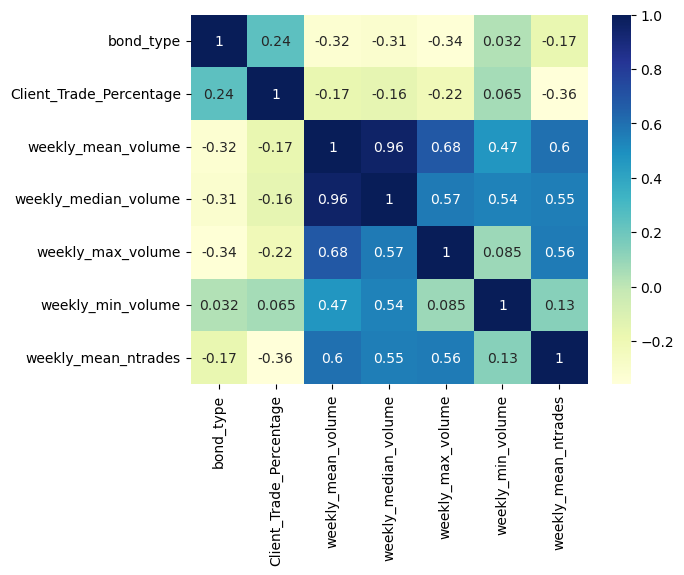

In [18]:
# plotting correlation heatmap
dataplot = sb.heatmap(data_cor.corr(), cmap="YlGnBu", annot=True)
  

In [2]:
print("My name is {Joshua Muzei}")
print("My NetID is: {jmuzei2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Joshua Muzei}
My NetID is: {jmuzei2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
